# ПРОЕКТ: АНАЛИТИКА В ЯНДЕКС.АФИШЕ 

Описание проекта
Задание: помочь маркетологам оптимизировать маркетинговые затраты.
Есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.


Изучить:
- как люди пользуются продуктом,
- когда они начинают покупать,
- сколько денег приносит каждый клиент
- когда клиент окупается.


План:


Продукт
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?


Продажи
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)


Маркетинг
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)

### Задание. Оптимизация маркетинговых затрат. 

In [1]:
#импорт библиотек
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Шаг 1. Предобработка данных

Таблица visits (лог сервера с информацией о посещениях сайта):
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь

Таблица orders (информация о заказах):
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа

Таблица costs (информация о затратах на маркетинг):
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день

In [2]:
#читаем файлы
visits = pd.read_csv('',dtype={'Uid':'object'}, parse_dates = ['Start Ts', 'End Ts'])
orders = pd.read_csv('', dtype={'Uid':'object'})
costs = pd.read_csv('', parse_dates = ['dt'])

Столбец Uid (уникальный идентификатор пользователя) переводим в формат object, даты Start Ts — дата и время начала сессии, End Ts — дата и время окончания сессии, Start Ts — дата и время начала сессии
End Ts — дата и время окончания сессии, dt — дата в формат datetime64[ns]

In [3]:
#функция для просмотра таблиц
def info(df):
    df = df.copy()
    display(df.head(5))
    display(df.info())

In [4]:
#применяем фукцию для просмотра таблицы visits
info(visits)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null object
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 13.7+ MB


None

In [5]:
def rename(df):
    df.columns = ['_'.join(col.lower().split()) for col in df.columns]

In [6]:
rename(visits)


In [7]:
#количество уникальных пользователей с каждого устройства
visits.groupby('device')['uid'].nunique()

device
desktop    164523
touch       71345
Name: uid, dtype: int64

In [8]:
#количество уникальных пользователей с разных источников
visits.groupby('source_id')['uid'].nunique().sort_values()

source_id
6         6
7        34
10     8067
9      9264
1     18999
2     26245
5     56974
3     74756
4     83525
Name: uid, dtype: int64

In [9]:
#применяем фукцию для просмотра таблицы orders
info(orders)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null object
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


None

In [10]:
#переименование названий столбцов
rename(orders)
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
#применяем фукцию для просмотра таблицы costs
info(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

Выводы: рассмотрели таблицы посещений Яндекс.Афишы с разных устройств и источников, покупки, стоимость рекламы по источникам. Преобразовали показатели в нужный тип данных, переименовали названия столбцов. Данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года. Сайт Яндекс.Афиша посещают с рабочего стола в 2 раза чаще, чем с мобильного экрана. Рекламных источников - 9. Всего посещений сайта за все время 359400, а покупок 50415. 

In [12]:
visits_copy = visits.copy()
orders_copy = orders.copy()

### Шаг 2. Постройте отчёты и посчитайте метрики

Продукт
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

In [13]:
#оставили формат даты
visits['end_ts_date'] = visits['end_ts'].astype('datetime64[D]')
visits['start_ts_date'] = visits['start_ts'].astype('datetime64[D]')

In [14]:
visits.head()

,device,end_ts,source_id,start_ts,uid,end_ts_date,start_ts_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-27


In [15]:
#создали столбцы с годом, месяцем и неделей старта сессии
visits['start_ts_year'] = visits['start_ts_date'].dt.year
visits['start_ts_month'] = visits['start_ts_date'].dt.month
visits['start_ts_week'] = visits['start_ts_date'].dt.week
visits.head()

,device,end_ts,source_id,start_ts,uid,end_ts_date,start_ts_date,start_ts_year,start_ts_month,start_ts_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-20,2017,12,51
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018,2,8
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017,7,26
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-20,2018,5,20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-27,2017,12,52


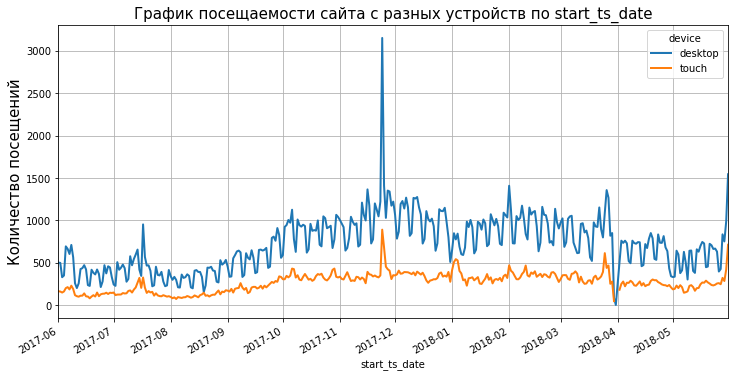

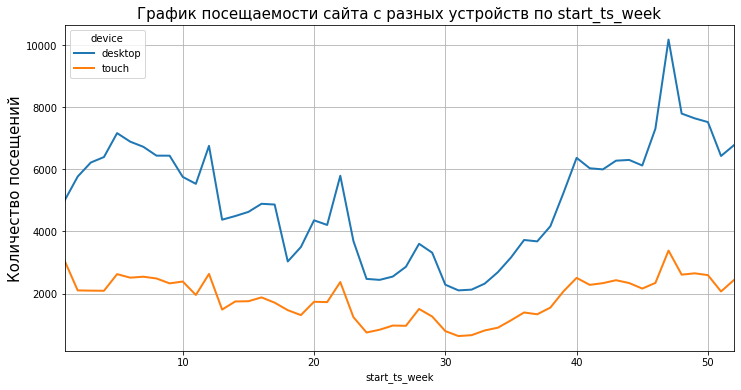

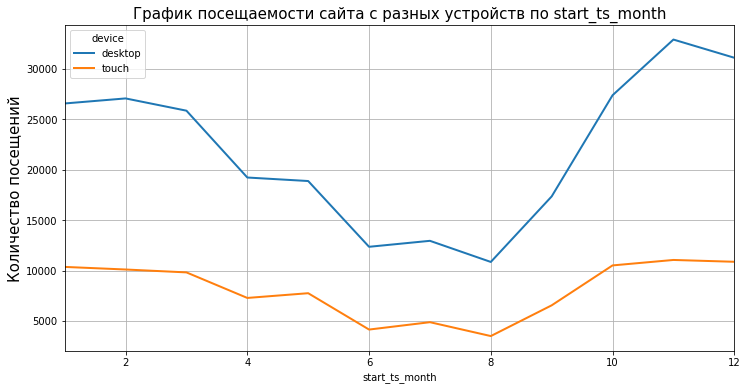

In [16]:
#цикл по 3 столбцам: дата, неделя, месяц
for column in ['start_ts_date', 'start_ts_week', 'start_ts_month']:
    visits.pivot_table(index=column, columns='device', values='uid', aggfunc='count').plot(figsize=(12,6), grid=True, linewidth = 2)
    plt.title('График посещаемости сайта с разных устройств по' + ' '+ column, fontsize=15)
    plt.ylabel('Количество посещений',fontsize=15)
    plt.show()

Выводы: по графикам видно, что сайт Яндекс.Афишы посещают больше с desktop. В среднем в день сайт посещают 1000 раз, в неделю - 6000, в месяц  - 25000 раз. Причем в конце ноября было сильное отклонение - посещение в день более 3500 раз, что в итоге за ноябрь увеличило показатели посещаемости до 40 000 раз.

Text(0.5, 0, 'Дата')

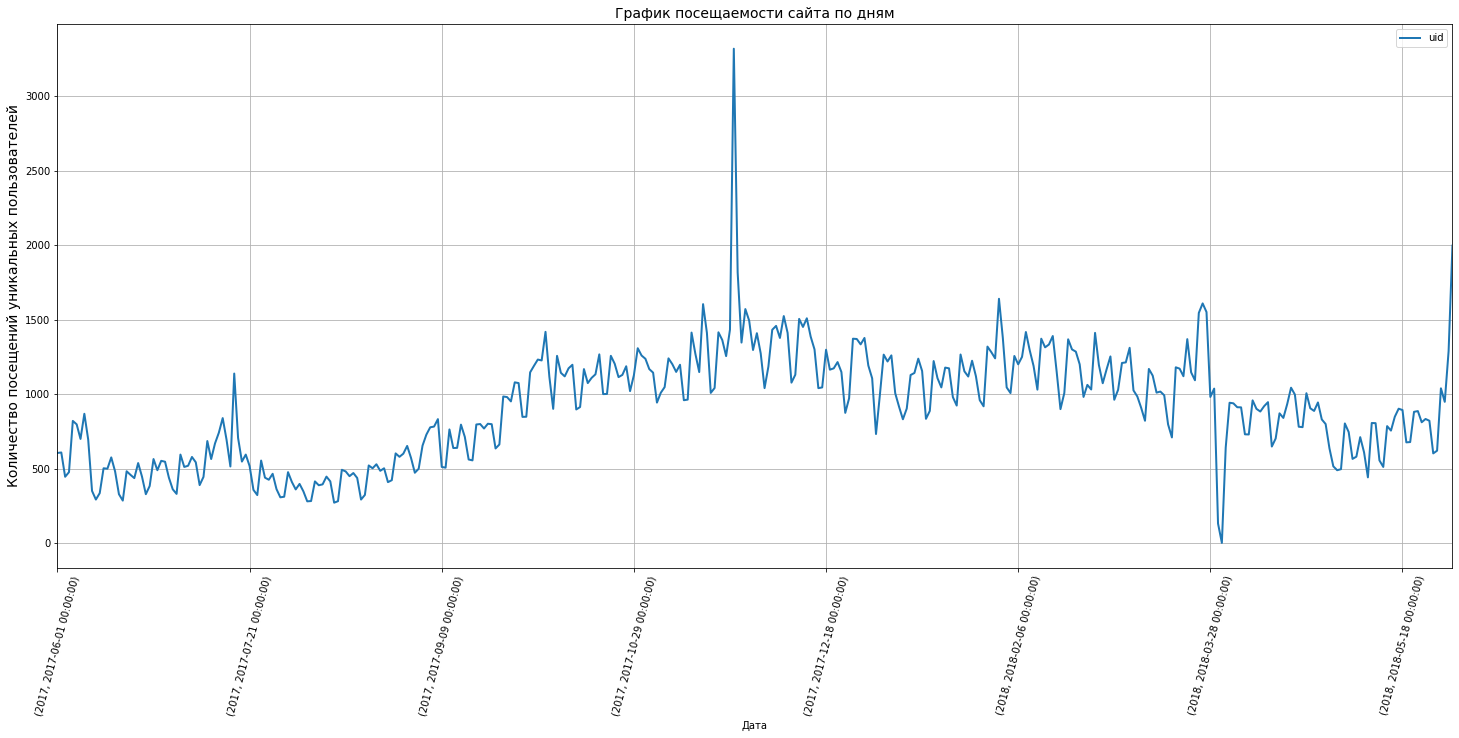

In [17]:
#группировка по дате и подсчет уникальных uid, построение графика
visits.groupby(['start_ts_year','start_ts_date']).agg({'uid':'nunique'}).plot(figsize=(25,10), linewidth = 2, grid=True)
plt.title('График посещаемости сайта по дням',fontsize=14)
plt.ylabel('Количество посещений уникальных пользователей',fontsize=14)
plt.xticks(rotation=75)
plt.xlabel('Дата')

Пик посещения сайта свыше 3300  приходится на конец ноября , а минимум - 1 посещение начало апреля.

In [18]:
#группировка по дате и подсчет среднего уникальных uid
dau = int(visits.groupby(['start_ts_date']).agg({'uid':'nunique'}).mean())
print('Среднее количество уникальных пользователей в день:', dau)


Среднее количество уникальных пользователей в день: 907


Text(0.5, 0, 'Год.Неделя')

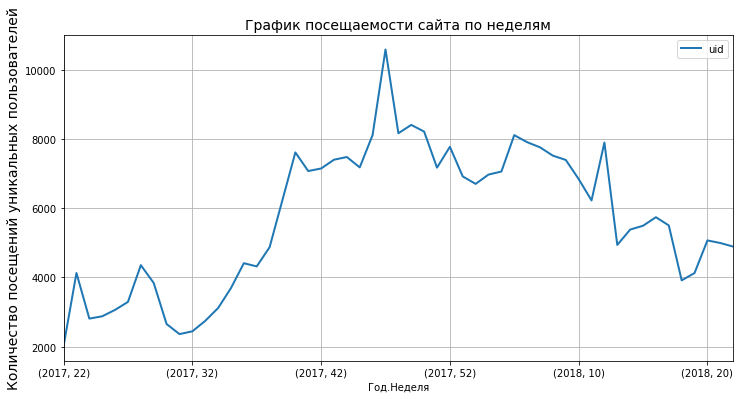

In [19]:
#группировка по неделе и подсчет уникальных uid, построение графика
visits.groupby(['start_ts_year','start_ts_week']).agg({'uid':'nunique'}).plot(figsize=(12,6), linewidth = 2, grid=True)
plt.title('График посещаемости сайта по неделям',fontsize=14)
plt.ylabel('Количество посещений уникальных пользователей',fontsize=14)
plt.xlabel('Год.Неделя')

In [20]:


#группировка по неделе и подсчет среднего уникальных uid
wau = int(visits.groupby(['start_ts_month', 'start_ts_week']).agg({'uid':'nunique'}).mean())
print('Среднее количество уникальных пользователей в неделю:', wau)


Среднее количество уникальных пользователей в неделю: 4911


Text(0.5, 0, 'Год,Месяц')

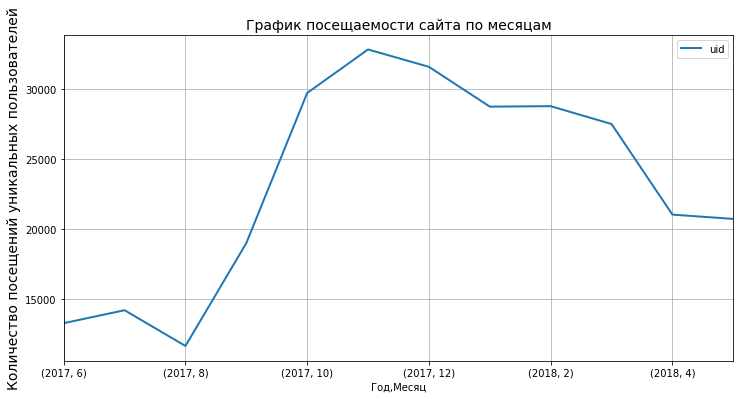

In [21]:
visits.groupby(['start_ts_year','start_ts_month']).agg({'uid':'nunique'}).plot(figsize=(12,6), linewidth = 2, grid=True)
plt.title('График посещаемости сайта по месяцам', fontsize=14)
plt.ylabel('Количество посещений уникальных пользователей', fontsize=14)
plt.xlabel('Год,Месяц')

In [22]:
visits.groupby(['start_ts_year','start_ts_month']).agg({'uid':'nunique'})

uid
start_ts_year start_ts_month       
2017          6               13259
              7               14183
              8               11631
              9               18975
              10              29692
              11              32797
              12              31557
2018          1               28716
              2               28749
              3               27473
              4               21008
              5               20701

In [23]:
#группировка по месяцу и подсчет среднего уникальных uid
mau = int(visits.groupby(['start_ts_year', 'start_ts_month']).agg({'uid':'nunique'}).mean())
print('Количество уникальных пользователей в месяц:', mau)


Количество уникальных пользователей в месяц: 23228


Выводы: количество уникальных посетителей сайта по сравнению с 2017 годом в 2018 году выросло в 2 раза. Максимальное количество посетителей сайта приходится на ноябрь и декабрь, наменьшее количество на август.

In [24]:
#группировка по дате, расчет количества сессий, количества уникальных сессий в день
#добавление столбца с количеством сессий на одного пользователя в день
visits_per_use_tabel = visits.\
groupby(['start_ts_year', 'start_ts_date']).\
agg(uid_count=('uid','count'), uid_unique = ('uid','nunique')).\
reset_index().\
assign(visit_per_use = lambda x: x['uid_count'] / x['uid_unique'])

visits_per_use_tabel


,start_ts_year,start_ts_date,uid_count,uid_unique,visit_per_use
0,2017,2017-06-01,664,605,1.097521
1,2017,2017-06-02,658,608,1.082237
2,2017,2017-06-03,477,445,1.071910
3,2017,2017-06-04,510,476,1.071429
4,2017,2017-06-05,893,820,1.089024
...,...,...,...,...,...
359,2018,2018-05-27,672,620,1.083871
360,2018,2018-05-28,1156,1039,1.112608
361,2018,2018-05-29,1035,948,1.091772
362,2018,2018-05-30,1410,1289,1.093871


In [25]:
print('Среднее количество сессий в день:',int((visits_per_use_tabel['uid_count'].mean())))

Среднее количество сессий в день: 987


In [26]:
print('Среднее количество сессий в день на одного пользователя:',int(visits_per_use_tabel['visit_per_use'].mean()))

Среднее количество сессий в день на одного пользователя: 1


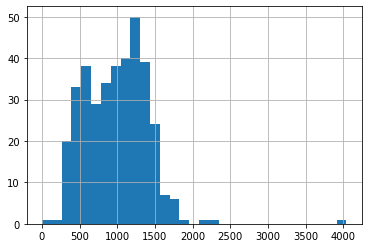

In [27]:
#гистограмма количества сессий в день
visits_per_use_tabel['uid_count'].hist(bins=31)

Так как гистограмма иллюстрирует нормальное распределение, берем среднее значение

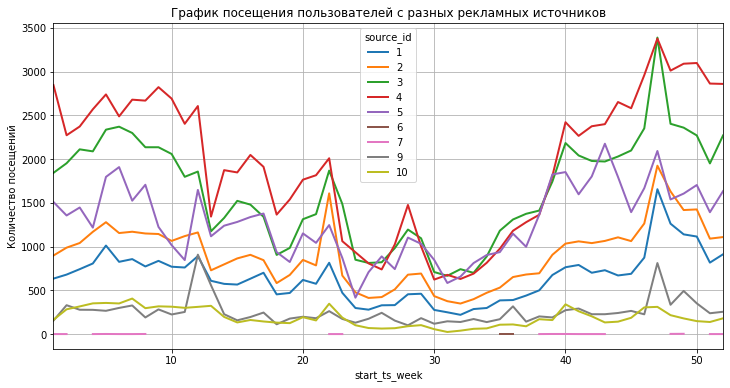

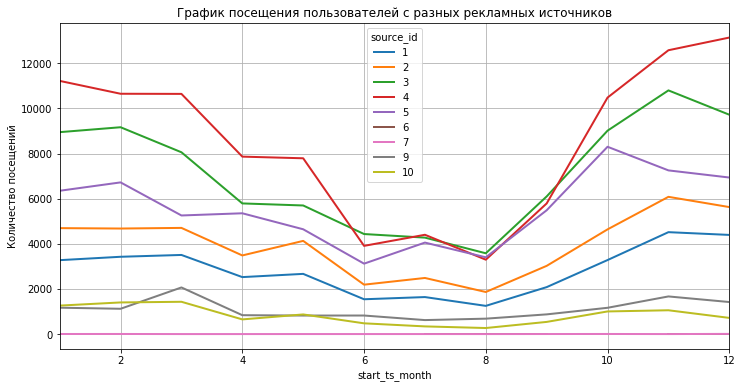

In [28]:
#цикл построения графика группировки посещений по источникам
for column in ['start_ts_week', 'start_ts_month']:
    visits.pivot_table(index=column, columns='source_id', values='uid', aggfunc='count').plot(figsize=(12,6), linewidth = 2, grid=True)
    plt.title('График посещения пользователей с разных рекламных источников')
    plt.ylabel('Количество посещений')
    plt.show()

Самое большое количество посещений с источника 4, 3, 5. Причем в месяц самого низкого посещения в августе эти источники рекламы сравнялись.  

In [29]:
#срез старт сессии больше окончания сессии
visits.loc[visits['start_ts'] > visits['end_ts']]

,device,end_ts,source_id,start_ts,uid,end_ts_date,start_ts_date,start_ts_year,start_ts_month,start_ts_week
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018-03-25,2018-03-25,2018,3,12
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018-03-25,2018-03-25,2018,3,12


Количество сессий, где время начала захода на сайт позже времени выхода - 2 позиции. На общий показатель внияние не окажет.

In [30]:
round(visits.loc[visits['start_ts'] == visits['end_ts']].shape[0] *100 / visits.shape[0])

10

Количество сессий длительностью в 0 секунд - 10%

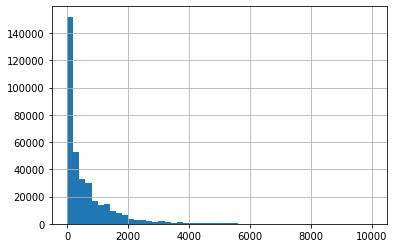

In [31]:
#добавили новый столбец в таблице visits
visits['visit_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['visit_duration_sec'].hist(bins=50, range=(0,10000))

In [32]:
visits['visit_duration_sec'].mean()

643.506488592098

(0, 1200)

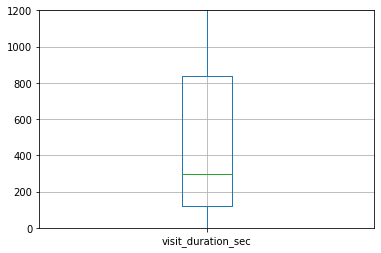

In [33]:
visits[['visit_duration_sec']].boxplot()
plt.ylim(0,1200)

In [34]:
print('Длительность сессии равняется: ' , int(visits['visit_duration_sec'].median()), 'секунд')

Длительность сессии равняется:  300 секунд


Посчитаем sticky factor, то как часто пользователи возвращаются. 

sticky factor = DAU/WAU или sticky factor = DAU/MAU

In [35]:
print('sticky factor = DAU/MAU, ' , int(dau*100/mau))

sticky factor = DAU/MAU,  3


In [36]:
print('sticky factor = DAU/WAU, ' , int(dau*100/wau))

sticky factor = DAU/WAU,  18


Продажи
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?


In [37]:
first_order_date = orders.groupby('uid')['buy_ts'].min()                    #первая дата покупки (группировка по посетителям)
first_order_date.name = 'first_order_date'                                  #переименование столбца Series
orders = orders.merge(first_order_date, on = 'uid')                         #объединение таблицы orders с первой датой покупки
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')   #новый столбец первый месяц покупки
orders['buy_ts'] = orders['buy_ts'].astype('datetime64[M]')                        #перевод формата даты
orders.head()

,buy_ts,revenue,uid,first_order_date,first_order_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01


Количество покупателей по месяцам и по когортам

In [38]:
orders.pivot_table(index='first_order_month',
    columns='buy_ts',
    values='uid',
    aggfunc='nunique').fillna('')

buy_ts,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023,61,50,54,88,67,62,47,58,45,45,53,
2017-07-01,,1923,52,57,64,49,38,36,39,42,22,26,
2017-08-01,,,1370,58,53,44,40,32,30,44,19,31,
2017-09-01,,,,2581,130,100,74,52,64,66,37,43,
2017-10-01,,,,,4340,206,123,92,93,72,56,67,
2017-11-01,,,,,,4081,222,120,106,81,48,62,
2017-12-01,,,,,,,4383,146,103,97,50,63,
2018-01-01,,,,,,,,3373,114,83,43,45,
2018-02-01,,,,,,,,,3651,118,58,39,


Количество покупок по месяцам и по когортам

In [39]:
orders.pivot_table(index='first_order_month',
    columns='buy_ts',
    values='uid',
    aggfunc='count').fillna('')

buy_ts,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2354,177,174,226,292,218,276,174,212,153,96,86,
2017-07-01,,2186,100,120,104,72,82,61,50,58,24,53,
2017-08-01,,,1533,108,100,81,85,62,49,78,46,46,
2017-09-01,,,,2933,219,161,164,67,109,108,56,61,
2017-10-01,,,,,4964,314,162,122,129,103,86,125,
2017-11-01,,,,,,4813,397,182,211,136,59,102,
2017-12-01,,,,,,,5052,270,202,179,86,105,
2018-01-01,,,,,,,,3783,224,159,64,78,
2018-02-01,,,,,,,,,4095,222,83,70,


Количество покупок по месяцам

Text(0, 0.5, 'Количество')

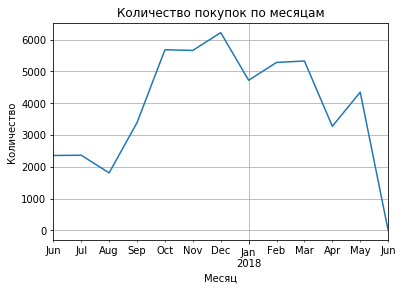

In [40]:
orders.groupby('buy_ts')['uid'].agg('count').plot(grid=True)
plt.title('Количество покупок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество')

Количество покупок самое высокое в ноябре и декабре 2017. В те же месяцы, когда было самое высокое количество посещений сайта. Самое никзкое количество покупок было в августе 2017. Количество покупок с 2017 года увеличилось. 

In [41]:
print('Среднее количество покупок за весь период: ',int(orders.groupby('buy_ts')['uid'].agg('count').mean()))

Среднее количество покупок за весь период:  3878


Найдем средний чек

Формирование когорт по первому месяцу покупки

In [42]:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','buy_ts']).agg({'revenue':'sum','uid':'nunique'}).reset_index()
orders_grouped_by_cohorts

,first_order_month,buy_ts,revenue,uid
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,61
2,2017-06-01,2017-08-01,885.34,50
3,2017-06-01,2017-09-01,1931.30,54
4,2017-06-01,2017-10-01,2068.58,88
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,58
75,2018-04-01,2018-04-01,10600.69,2276
76,2018-04-01,2018-05-01,1209.92,69
77,2018-05-01,2018-05-01,13925.76,2988


Сводная таблица изменения среднего чека покупателей по когортам и по месяцу совершения покупки

In [43]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='buy_ts',values='revenue_per_user',aggfunc='mean')

buy_ts,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


Найдем lifetime когорты

In [44]:
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['buy_ts'] - orders_grouped_by_cohorts['first_order_month']

orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')

Построим сводную таблицу изменения среднего чека, где в столбцах будет lifetime, а строках — когорты

In [45]:
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')
revenue_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09-01,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11-01,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Оставим от первой даты покупки год и месяц

Визуализация когортного анализа

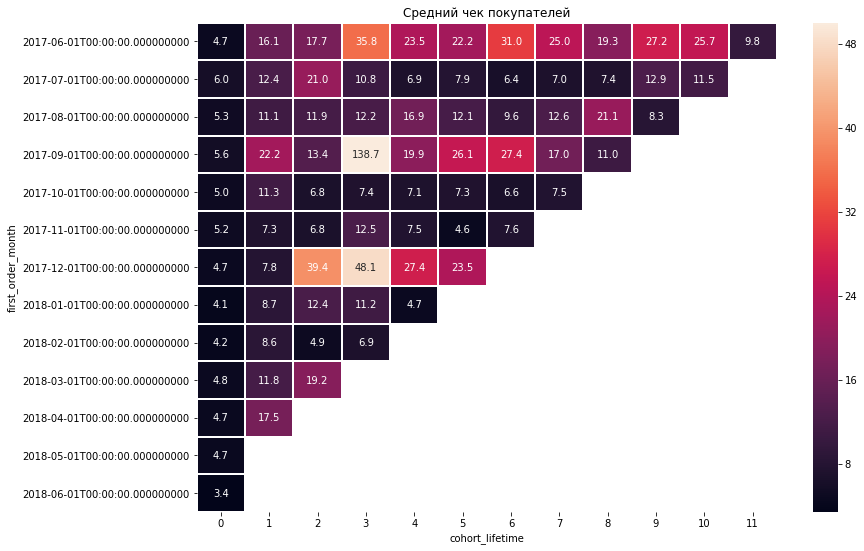

In [46]:
plt.figure(figsize=(13, 9))
plt.title('Средний чек покупателей')
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='white', vmax=50)

Средний чек на первый месяц жизни когорты всегда увеличивается. 2 когорты, которые показывают не сильное изменение среднего чека - 2017-07 и 2017-10. Самый высокий средний чек на 3 месяц жизни когорты показывает 2017-09

In [47]:
print('Средний чек за весь период', int(orders_grouped_by_cohorts['revenue_per_user'].mean()))

Средний чек за весь период 14


Найдем RETENTION RATE - коэффициент удержания

In [48]:
visits.head(2)

,device,end_ts,source_id,start_ts,uid,end_ts_date,start_ts_date,start_ts_year,start_ts_month,start_ts_week,visit_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-20,2017,12,51,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018,2,8,1680


Найдем цикл жизни и запишем в таблицу orders

In [49]:
first_start_date = visits.groupby('uid')['start_ts'].min()                    #первая дата захода (группировка по посетителям)
first_start_date.name = 'first_start_date'                                  #переименование столбца Series
visits = visits.merge(first_start_date, on = 'uid')                         #объединение таблицы visits с первой датой захода
visits['first_start_month'] = visits['first_start_date'].astype('datetime64[M]')   #новый столбец первый месяц покупки
visits['start_ts_date'] = visits['start_ts_date'].astype('datetime64[M]')                        #перевод формата даты
visits.head(2)

,device,end_ts,source_id,start_ts,uid,end_ts_date,start_ts_date,start_ts_year,start_ts_month,start_ts_week,visit_duration_sec,first_start_date,first_start_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017,12,51,1080,2017-12-20 17:20:00,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018,2,8,1680,2018-02-19 16:53:00,2018-02-01


In [50]:
visits['cohort_lifetime'] = visits['start_ts_date'] - visits['first_start_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [51]:
orders.head()

,buy_ts,revenue,uid,first_order_date,first_order_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01


In [52]:
orders['cohort_lifetime'] = orders['buy_ts'] - orders['first_order_month']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')

Оставим дату в виде года и месяца

In [53]:
orders['first_order_month'].dt.strftime('%d.%m.%Y')
orders['first_order_month'] = orders['first_order_month'].dt.strftime('%Y-%m')

In [54]:
visits['first_start_month'].dt.strftime('%d.%m.%Y')
visits['first_start_month'] = visits['first_start_month'].dt.strftime('%Y-%m')

Группируем по когортам и считаем количество уникальных пользователей по месяцам жизни

In [55]:
cohorts_visits = visits.groupby(['first_start_month' , 'cohort_lifetime']).agg({'uid' : 'nunique'}).reset_index()

In [56]:
cohorts = orders.groupby(['first_order_month' , 'cohort_lifetime']).agg({'uid' : 'nunique'}).reset_index()

Найдем исходное количество пользователей в каждой когорте

In [57]:
initial_users_count_visits = cohorts_visits[cohorts_visits['cohort_lifetime'] == 0][['first_start_month','uid']]
initial_users_count_visits

,first_start_month,uid
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977
50,2017-11,27248
57,2017-12,25268
63,2018-01,22624
68,2018-02,22197
72,2018-03,20589


In [58]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_order_month','uid']]
initial_users_count

,first_order_month,uid
0,2017-06,2023
12,2017-07,1923
23,2017-08,1370
33,2017-09,2581
42,2017-10,4340
50,2017-11,4081
57,2017-12,4383
63,2018-01,3373
68,2018-02,3651
72,2018-03,3533


Переименовали столбец

In [59]:
initial_users_count_visits = initial_users_count_visits.rename(columns={'uid':'cohort_users'})

In [60]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

Объединили данные по когорте с исходным количеством пользователей

In [61]:
cohorts = cohorts.merge(initial_users_count,on='first_order_month')
initial_users_count_visits.head(2)

,first_start_month,cohort_users
0,2017-06,13259
12,2017-07,13140


In [62]:
cohorts_visits = cohorts_visits.merge(initial_users_count_visits,on='first_start_month')

Находим RETENTION RATE. Делим количество активных пользователей на исходное количество в когорте

In [63]:
cohorts_visits['retention'] = cohorts_visits ['uid']/cohorts_visits ['cohort_users']

Строим сводную таблицу и создаем тепловую карту

In [64]:
retention_pivot = cohorts_visits .pivot_table(index='first_start_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_start_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


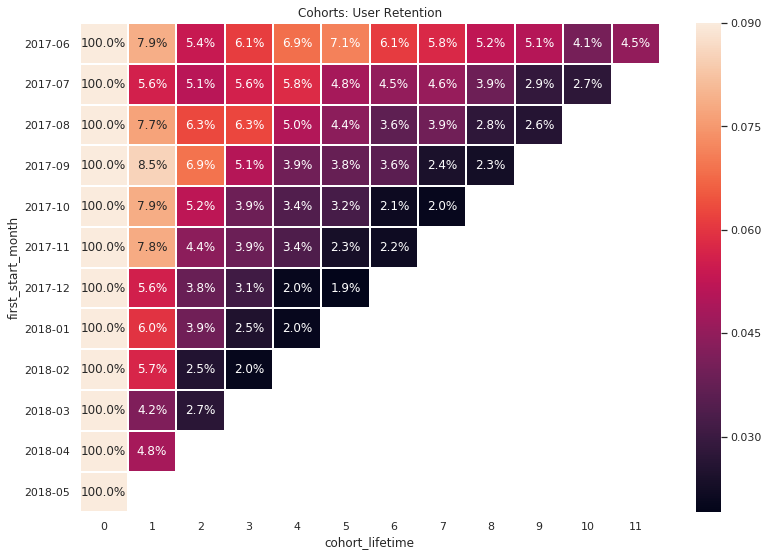

In [65]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='white', vmax=0.09)

Retention Rate убывает по когортам с каждым месяцем. Самый высокий коэффициент удержания в первый месяц жизни характерен для когорт 2017-09, 2017-10, 2017-11.

In [66]:
print('Средний retention за весь период с первого месяца жизни {:.1%}'.format(cohorts_visits.loc[cohorts['cohort_lifetime']!=0]['retention'].mean()))

Средний retention за весь период с первого месяца жизни 4.4%


Когда начинают покупать

Объединяем таблицы visits и orders

In [67]:
merge_visits_orders = visits.merge(orders, on = 'uid')

In [68]:
merge_visits_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761807 entries, 0 to 761806
Data columns (total 19 columns):
device                761807 non-null object
end_ts                761807 non-null datetime64[ns]
source_id             761807 non-null int64
start_ts              761807 non-null datetime64[ns]
uid                   761807 non-null object
end_ts_date           761807 non-null datetime64[ns]
start_ts_date         761807 non-null datetime64[ns]
start_ts_year         761807 non-null int64
start_ts_month        761807 non-null int64
start_ts_week         761807 non-null int64
visit_duration_sec    761807 non-null int64
first_start_date      761807 non-null datetime64[ns]
first_start_month     761807 non-null object
cohort_lifetime_x     761807 non-null int64
buy_ts                761807 non-null datetime64[ns]
revenue               761807 non-null float64
first_order_date      761807 non-null object
first_order_month     761807 non-null object
cohort_lifetime_y     761807 non-nul

In [69]:
merge_visits_orders['first_order_date'] = merge_visits_orders['first_order_date'].astype('datetime64[ns]')

Добавим столбец проверки первой даты покупки и начала сессии

In [70]:
merge_visits_orders['sravni'] = merge_visits_orders['first_order_date'] >= merge_visits_orders['start_ts']
merge_visits_orders['sravni'].head()

0    False
1     True
2     True
3     True
4     True
Name: sravni, dtype: bool

In [71]:
orders_copy['buy_ts'] = pd.to_datetime(orders_copy['buy_ts'])

In [72]:
visits_copy\
    .groupby('uid')\
    .agg({'start_ts':['min']})\
    .join(orders_copy.groupby('uid').agg({'buy_ts':'min'}), how='inner')\
    .assign(time_to_buy = lambda row: (row['buy_ts'] - row[('start_ts', 'min')]).dt.total_seconds()//60).describe()

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,time_to_buy
count,36523.000000
mean,24340.175834
std,67784.774690
min,0.000000
25%,4.000000
50%,16.000000
75%,2897.000000
max,523144.000000


Возьмем срез, когда первая дата  покупки больше или равна началу сессии, сгруппируем по пользователям и посчитаем количество таких сессий

In [73]:
orders_sravni = merge_visits_orders.loc[merge_visits_orders['sravni'] == True].\
groupby('uid')['sravni'].agg('count').\
reset_index().sort_values(by='sravni', ascending=False)      
orders_sravni = orders_sravni.rename(columns={'uid':'uid', 'sravni':'number_first_buy_session'})
orders_sravni.head()

,uid,number_first_buy_session
28505,6268225112727843212,2385
35905,9737640335185488211,1128
26826,5539673724080479777,1010
21748,3263486045884611639,786
32397,8056418121947262981,754


In [74]:
orders_sravni['number_first_buy_session'].describe()

count    36523.000000
mean         2.515976
std         18.730685
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       2385.000000
Name: number_first_buy_session, dtype: float64

Пользователи совершают покупку на 2-3 сессии

Сколько денег приносят? (LTV)


Маркетинг
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)

Информация о заказах

In [75]:
orders.head()

,buy_ts,revenue,uid,first_order_date,first_order_month,cohort_lifetime
0,2017-06-01,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06,0
1,2017-06-01,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06,0
2,2017-06-01,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06,0
3,2017-06-01,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06,0
4,2017-06-01,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06,0


Информация о расходах

In [76]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [77]:
costs['dt'] = costs['dt'].astype('datetime64[M]')

In [78]:
# считаем расходы за месяц
monthly_costs = costs.groupby('dt')['costs'].agg('sum').reset_index()
monthly_costs

,dt,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Text(0.5, 0, 'Дата')

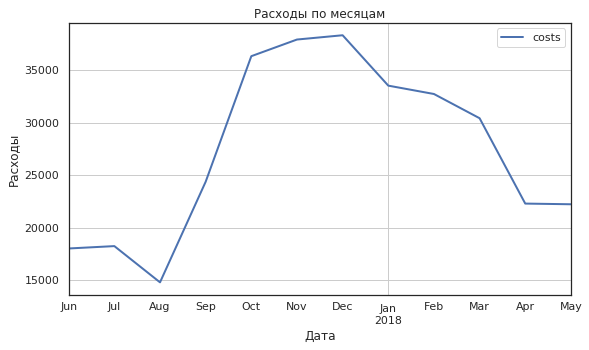

In [79]:
monthly_costs.plot(x= 'dt', y = 'costs', grid = True, linewidth = 2, figsize=(9,5))
plt.title('Расходы по месяцам')
plt.ylabel('Расходы')
plt.xlabel('Дата')

In [80]:
monthly_costs_by_source = costs.groupby(['source_id']).sum().reset_index()
monthly_costs_by_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Text(0.5, 0, 'Источники')

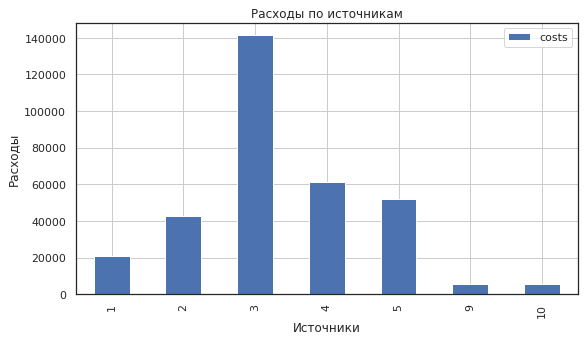

In [81]:
monthly_costs_by_source.plot(kind = 'bar', x = 'source_id' , y = 'costs', grid = True, figsize=(9,5))
plt.title('Расходы по источникам')
plt.ylabel('Расходы')
plt.xlabel('Источники')

In [82]:
print('Расходы за все время: ' ,monthly_costs['costs'].sum().round(2))

Расходы за все время:  329131.62


In [83]:
initial_users_count.head()

,first_order_month,cohort_users
0,2017-06,2023
12,2017-07,1923
23,2017-08,1370
33,2017-09,2581
42,2017-10,4340


In [84]:
orders.head()

,buy_ts,revenue,uid,first_order_date,first_order_month,cohort_lifetime
0,2017-06-01,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06,0
1,2017-06-01,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06,0
2,2017-06-01,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06,0
3,2017-06-01,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06,0
4,2017-06-01,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06,0


In [85]:
orders_grouped_by_cohorts.head()

,first_order_month,buy_ts,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4


Объединяем таблицы сгруппированные когорты и число пользователей в когорте изначально

In [86]:
orders_grouped_by_cohorts.info()
initial_users_count['first_order_month'] = initial_users_count['first_order_month'].astype('datetime64[ns]')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
first_order_month    79 non-null datetime64[ns]
buy_ts               79 non-null datetime64[ns]
revenue              79 non-null float64
uid                  79 non-null int64
revenue_per_user     79 non-null float64
cohort_lifetime      79 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 3.8 KB


In [87]:
report = pd.merge(initial_users_count, orders_grouped_by_cohorts, on = 'first_order_month')
report.head()

,first_order_month,cohort_users,buy_ts,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2023,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2023,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2023,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2023,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2023,2017-10-01,2068.58,88,23.506591,4


Считаем LTV

In [88]:
report['ltv'] = report['revenue'] / report['cohort_users']
report.head()

,first_order_month,cohort_users,buy_ts,revenue,uid,revenue_per_user,cohort_lifetime,ltv
0,2017-06-01,2023,2017-06-01,9557.49,2023,4.724414,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,61,16.095410,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,50,17.706800,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,54,35.764815,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,88,23.506591,4,1.022531


Сводная таблица LTV  по когортам , жизненному циклу

In [89]:
output = report.pivot_table(index='first_order_month', columns = 'cohort_lifetime', values = 'ltv', aggfunc = 'mean').round(2)

output.cumsum(axis=1).round(2).fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5,5.93,7,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


Посчитаем итоговый LTV первой когорты. Сложим их LTV по месяцам:

In [90]:
report['first_order_month'] = report['first_order_month'].astype('datetime64[M]')  

Сводная таблица и расчет CAC

In [91]:
report_new = pd.merge(report, monthly_costs, left_on = 'first_order_month', right_on = 'dt')
report_new['cac'] = report_new['costs'] / report_new['cohort_users'].round(2)
report_new.head()

,first_order_month,cohort_users,buy_ts,revenue,uid,revenue_per_user,cohort_lifetime,ltv,dt,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,2023,4.724414,0,4.724414,2017-06-01,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,61,16.095410,1,0.485329,2017-06-01,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,50,17.706800,2,0.437637,2017-06-01,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,54,35.764815,3,0.954671,2017-06-01,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,88,23.506591,4,1.022531,2017-06-01,18015.0,8.905091


Стоимость привлечения каждой когорты

In [92]:
report_new.groupby('first_order_month')['cac'].agg('mean').round(2)

first_order_month
2017-06-01     8.91
2017-07-01     9.49
2017-08-01    10.80
2017-09-01     9.44
2017-10-01     8.37
2017-11-01     9.29
2017-12-01     8.74
2018-01-01     9.94
2018-02-01     8.96
2018-03-01     8.61
2018-04-01     9.79
2018-05-01     7.44
Name: cac, dtype: float64

In [93]:
print('Среднее значение CAC ', report_new['cac'].agg('mean').round(2))

Среднее значение CAC  9.32


In [94]:
report_new['romi'] = report_new['ltv'] / report_new['cac']

In [95]:
print('Среднее значение ROMI ', report_new['romi'].mean().round(2))

Среднее значение ROMI  0.12


In [96]:
output_new = report_new.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values='romi', 
        aggfunc='mean')

output_new.cumsum(axis=1).round(2).fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


In [97]:
#среднее значение ROMI по жизненному циклу
output_new.cumsum(axis=1).mean(axis=0)

cohort_lifetime
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

Проект окупается на 9 месяц

In [98]:
#группировка по дате  и источнику рекламы
#расчет затрат
monthly_costs_by_source_dt = costs.groupby(['dt','source_id']).sum().reset_index()
monthly_costs_by_source_dt.head()

,dt,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [99]:
report.head()

,first_order_month,cohort_users,buy_ts,revenue,uid,revenue_per_user,cohort_lifetime,ltv
0,2017-06-01,2023,2017-06-01,9557.49,2023,4.724414,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,61,16.095410,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,50,17.706800,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,54,35.764815,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,88,23.506591,4,1.022531


In [100]:
#объединение таблиц
report_cac_by_source = pd.merge(report, monthly_costs_by_source_dt, left_on = 'first_order_month', right_on = 'dt')
report_cac_by_source.head()

,first_order_month,cohort_users,buy_ts,revenue,uid,revenue_per_user,cohort_lifetime,ltv,dt,source_id,costs
0,2017-06-01,2023,2017-06-01,9557.49,2023,4.724414,0,4.724414,2017-06-01,1,1125.61
1,2017-06-01,2023,2017-06-01,9557.49,2023,4.724414,0,4.724414,2017-06-01,2,2427.38
2,2017-06-01,2023,2017-06-01,9557.49,2023,4.724414,0,4.724414,2017-06-01,3,7731.65
3,2017-06-01,2023,2017-06-01,9557.49,2023,4.724414,0,4.724414,2017-06-01,4,3514.80
4,2017-06-01,2023,2017-06-01,9557.49,2023,4.724414,0,4.724414,2017-06-01,5,2616.12


Сколько стоит привлечение из каждого источника

In [101]:
report_cac_by_source['cac'] = report_cac_by_source['costs'] / report_cac_by_source['cohort_users'].round(2)
report_cac_by_source.groupby('source_id')['cac'].agg('mean')

source_id
1     0.584459
2     1.204565
3     3.970902
4     1.788124
5     1.451675
9     0.155861
10    0.164318
Name: cac, dtype: float64

Таблица, характеризующая сколько стоит привлчение каждой когорты из каждого источника

In [102]:
output_cac_by_source = report_cac_by_source.pivot_table(index=['first_order_month'], columns = 'source_id', values = 'cac', aggfunc = 'mean').round(3)
output_cac_by_source

source_id,1,2,3,4,5,9,10
first_order_month,,,,,,,
2017-06-01,0.556,1.200,3.822,1.737,1.293,0.141,0.155
2017-07-01,0.558,1.213,3.991,1.836,1.559,0.157,0.172
2017-08-01,0.695,1.322,4.484,2.348,1.595,0.182,0.170
2017-09-01,0.582,1.157,3.860,2.012,1.491,0.161,0.178
2017-10-01,0.534,1.116,3.626,1.479,1.329,0.140,0.145
2017-11-01,0.599,1.286,4.172,1.320,1.550,0.167,0.194
2017-12-01,0.534,1.117,3.701,1.752,1.340,0.150,0.147
2018-01-01,0.648,1.233,4.390,1.729,1.593,0.162,0.182
2018-02-01,0.604,1.226,3.897,1.564,1.389,0.151,0.132


In [103]:
output_cac_by_source_time = report_cac_by_source.\
pivot_table(index=['source_id'], columns = 'cohort_lifetime', values = 'cac', aggfunc = 'mean').round(3)
output_cac_by_source_time

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.577,0.584,0.585,0.590,0.588,0.580,0.587,0.585,0.598,0.603,0.557,0.556
2,1.183,1.209,1.199,1.208,1.206,1.202,1.216,1.202,1.223,1.245,1.207,1.200
3,3.907,3.976,3.965,3.994,4.006,3.951,3.993,3.957,4.039,4.099,3.906,3.822
4,1.734,1.764,1.747,1.753,1.777,1.784,1.789,1.883,1.983,1.974,1.786,1.737
5,1.432,1.451,1.442,1.460,1.469,1.451,1.470,1.454,1.485,1.482,1.426,1.293
9,0.153,0.156,0.155,0.157,0.158,0.157,0.158,0.156,0.160,0.160,0.149,0.141
10,0.161,0.163,0.162,0.164,0.168,0.166,0.169,0.164,0.169,0.166,0.163,0.155


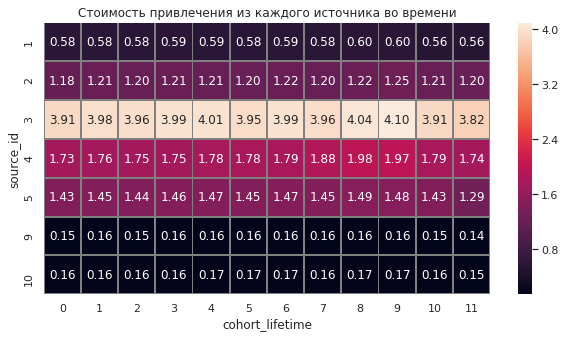

In [104]:
plt.figure(figsize=(10, 5))
plt.title('Стоимость привлечения из каждого источника во времени')
sns.heatmap(output_cac_by_source_time, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

Стоимость привлечения клиента из каждого источника 

In [105]:
merge_visits_orders_cohorts = merge_visits_orders.groupby(['source_id']).agg({'revenue':'sum','uid':'nunique'}).reset_index()
merge_visits_orders_cohorts['revenue_per_user'] = merge_visits_orders_cohorts['revenue'] / merge_visits_orders_cohorts['uid']
merge_visits_orders_cohorts.pivot_table(index='source_id',values='revenue_per_user',aggfunc='mean').round(2).reset_index()

,source_id,revenue_per_user
0,1,321.97
1,2,361.15
2,3,21.43
3,4,34.85
4,5,116.33
5,7,1.22
6,9,13.01
7,10,8.25


## ИТОГОВАЯ ТАБЛИЦА. КОГОРТНЫЙ АНАЛИЗ

| Когорта |      |   0   |   1   |   2   |   3   |   4   |   5   |   6   |   7   |   8   |   9   |   10   |   11   |   
|---------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|
|         |  LTV | 4.72	 | 5.21	 | 5.65  | 6.60	 | 7.62  | 8.36  |	9.31 |	9.89 |10.44  |	11.05|	11.62 |	11.88  | 
| 2017-06 |  CAC | 8.91  | 8.91  | 8.91  | 8.91  | 8.91  | 8.91  | 8.91  | 8.91  | 8.91  | 8.91  | 8.91   | 8.91   | 
|         |  RR  |100    |7.9    |5.4    |6.1    |6.9    | 7.1   |6.1    |5.8    |5.2    |5.1    |4.1     |4.5     |
|---------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|
|         |  LTV | 6.01	 | 6.35	 | 6.97	 | 7.33  |	7.51 |	7.67 |	7.79 | 7.93  | 8.09	 | 8.24	 | 8.4	  |		   |
| 2017-07 |  CAC | 9.49  | 9.49  | 9.49  | 9.49  | 9.49  | 9.49  | 9.49  | 9.49  | 9.49  | 9.49  | 9.49   |        | 
|         |  RR  |100    | 5.6   |5.1    |5.6    | 5.8   |4.8    |4.5    |  4.6  |3.9    |2.9    |2.7     |        |
|---------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|
|         |  LTV | 5.28	 |5.75   |	6.21 |	6.6  |	7.09 |	7.37 |	7.58 |	7.99 |	8.28 |	8.47 |        |        | 
| 2017-08 |  CAC |10.80  |10.80  |10.80  |10.80  |10.80  |10.80  |10.80  |10.80  |10.80  |10.80  |        |        | 
|         |  RR  |100    |7.7    |6.3    | 6.3   |5.0    | 4.4   |3.6    | 3.9   | 2.8   |2.6    |        |        |        
|---------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|
|         |  LTV |5.64	 |6.76   |	7.28 |	11.26|	11.66|	12.31|13.01  |13.25  |	13.43|       |        |        | 
| 2017-09 |  CAC |9.44   |9.44   |9.44   |9.44   |9.44   |9.44   |9.44   |9.44   |9.44   |       |        |        | 
|         |  RR  |100    |8.5    | 6.9   |5.1    |3.9    | 3.8   |3.6    |2.4    | 2.3   |       |        |        |
|---------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|
|         |  LTV |5.00   |	5.54 |	5.73 |	5.89 |	6.04 |	6.16 |	6.24 |	6.36 |	     |       |        |        |
| 2017-10 |  CAC |8.37   |8.37   |8.37   |8.37   |8.37   |8.37   |8.37   |8.37   |       |       |        |        |
|         |  RR  |100    | 7.9   |5.2    |3.9    |3.4    |3.2    | 2.1   |2.0    |       |       |        |        |
|---------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|
|         |  LTV |5.15	 | 5.55	 |5.75	 | 6.07	 | 6.22	 | 6.27	 | 6.38	 |       |       |       |        |        |
| 2017-11 |  CAC |9.29   |9.29   |9.29   |9.29   |9.29   |9.29   |9.29   |       |       |       |        |        |
|         |  RR  |100    |7.8    |4.4    |3.9    |3.4    | 2.3   |2.2    |       |       |       |        |        |
|---------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|
|         |  LTV |4.74	 | 5.00	 | 5.93	 | 7.00	 | 7.31	 | 7.65  |       |       |       |       |        |        |
| 2017-12 |  CAC |8.74   |8.74   |8.74   |8.74   |8.74   |8.74   |       |       |       |       |        |        |
|         | RR   |100    | 5.6   |3.8    |3.1    |2.0    | 1.9   |       |       |       |       |        |        |
|---------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|
|         | LTV  |4.14	 | 4.43	 |   4.73|	4.83 |	4.93 |	     |       |       |       |       |        |        |
| 2018-01 |  CAC |9.94   |9.94   |9.94   |9.94   |9.94   |       |       |       |       |       |        |        |
|         | RR   |100    |6.0    |3.9    |2.5    |       |       |       |       |       |       |        |        |
|---------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|
|         | LTV  |4.16	 | 4.44  |	4.52 |	4.59 |       |       |       |       |       |       |        |        |
| 2018-02 | CAC  |8.96   |8.96   |8.96   |8.96   |       |       |       |       |       |       |        |        |
|         | RR   |100    |5.7    |2.5    |2.0    |       |       |       |       |       |       |        |        |
|---------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|
|         | LTV  |4.84	 |5.14	 |5.46   |       |       |       |       |       |       |       |        |        |
| 2018-03 | CAC  |8.61   |8.61   |8.61   |       |       |       |       |       |       |       |        |        |
|         | RR   |100    | 4.2   |  2.7  |       |       |       |       |       |       |       |        |        |
|---------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|
|         | LTV  |4.66	 |5.19   |       |       |       |       |       |       |       |       |        |        |        
|2018-04  | CAC  |9.79   |9.79   |       |       |       |       |       |       |       |       |        |        |        
|         | RR   | 100   | 4.8   |       |       |       |       |       |       |       |       |        |        |
|---------|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|
|         | LTV  |4.66   |       |       |       |       |       |       |       |       |       |        |        |       
|2018-05  | CAC  |7.44   |       |       |       |       |       |       |       |       |       |        |        |
|         | RR   |100    |       |       |       |       |       |       |       |       |       |        |        |

Исследовали проект Яндекс.Афиши. 


У нас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года: посещения сайта, покупки, расходы по источникам

Сайт посещают с desktop в 2 раза чаще, чем с touch. Это необходимо учитывать при разработке сайта. Сайт Яндекс.Афишы посещают в среднем в день - 1000 раз, в неделю - 6000, в месяц  - 25000 раз. Причем в конце ноября было сильное отклонение - посещение в день более 3500 раз, что в итоге за ноябрь увеличило показатели посещаемости до 40 000 раз. Самая низкая посещаеомтьс сайта была в августе. Посещаемость сайта с 2017 года выросла в 2 раза.

В среднем пользователь посещает сайт 1 раз в день с длительностью 60 секунд. Было обнаружено, что 10% всех сессий длительностью в 0 секунд. Это либо ошибка данных, либо счетчика сессий. Требуется уточнение.

Самое большое количество посещений с источников 4, 3, 5. Причем в месяц самого низкого посещения в августе эти источники рекламы сравнялись.  



Покупки начинают совершать на 2-3 сессию. Количество покупок самое высокое в ноябре и декабре 2017 - 5000 и 6000 соответственно. В те же месяцы, когда было самое высокое количество посещений сайта. Самое низкое количество покупок было в августе 2017 - 2000. Количество покупок с 2017 года увеличилось. Среднее количество покупок в месяц за весь период 3878. Средний чек на первый месяц жизни когорты всегда увеличивается. Средний чек за весь период - 14. 2 когорты, которые показывают не сильное изменение среднего чека - 2017-07 и 2017-10. Самый высокий средний чек на 3 месяц жизни когорты показывает 2017-09. Возможно изменили условия продаж. Самый высокий средний чек показывают покупатели, привлчеченный с 1 и 2 источников. 

Самые большие расходы приходятся на месяцы высоких посещений сайта. Самые высокие расходы на источники 3,4,5. И привлечение одного покупателя самое высокое с 3 источника. Следует увеличить расходы на источники 4 и 5, снизить на 3. И увеличить расходы на 1 и 2 источники, так как средний чек с них высокий, а стоимость привлечения клиента низкая. 

Среднее LTV за весь период 11.88, средний САС 9.38. На окупаемость выходят на 9 месяц. Для того, чтобы получить прибыль в ноябре и декабре. необходимо начинать привлекать клиентов в сентябре. Так как когорта 2017-09 показала самые высокие результаты в пиковые месяцы. Когорты, привлеченные в ноябре и декабре таких высоких результатов не показали. Так же по когортному анализу и сводной таблице мы видим, что от одной когорте к другой снижается коэффициент удержания и LTV. Соответственно необходимо внести изменения по продукту. 